In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from konlpy.tag import Mecab
import sentencepiece as spm
from tensorflow import keras

%matplotlib inline



In [2]:
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


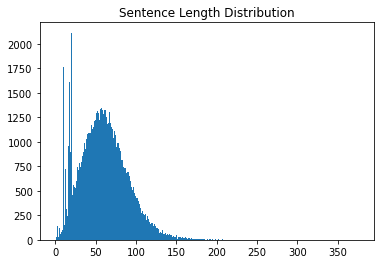

In [3]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [4]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [5]:
for idx, _sum in enumerate(sentence_length):
    # # 문장내 단어의 개수가 1500을 초과하는 인덱스를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [6]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [7]:
check_sentence_with_length(raw, 19)

성공할 수 있는 일들이 있습니다."
두번째 목적은 상품을 파는 것이다.
그것들은 무엇을 하기 위한 것인가?
- 어째서 그렇게 대단한 것입니까?
불매운동가들의 시선을 끌고 싶은가?
그리고 우리는 계속해서 외식을 하며
(나는 그가 정직하다고 생각한다.)
박스데일도 동일한 기법을 사용한다.
"우리는 전속력으로 달려야 합니다.
수익은 연 25%씩 늘어나고 있다.
미국인 반체제 인사 해리 우의 운명
국가를 위해 좋은 일이 될 것이라고
무역 적자는 무역 흑자로 돌아섰으며
경찰에서조차 수사를 벌이고 있습니다
다음 번이 3월1일로 예정되어있다.
우리는 허구적인 시대에 살고 있다.
모 아니면 도였지요’’라고 말했다.
이씨는 짧았던 결혼을 세 번 했다.
하지만 성인이 되려면 아직 멀었다.
양국은 상호 3위의 교역상대국이다.
어떻게 지속적인 동기부여를 받느냐?
편지는 의사소통 이상의 일을 한다.
식량 부족으로 고통받는 북한 주민들
그는 뉴욕 금융지구에 살고 있었다.
6. “교회에 열심히 나가는가요?”
신문사가 발견된 기밀문서를 받았다.
3.인맥을 두루 갖춰놓지 못하는 것
15.면접 질문에 집중하지 않는 것
20.월급 이야기를 일찍 꺼내는 것
디아즈는 진지해지려고 하지 않는다.
전갈은 월마트 직원에 의해 잡혔다.
4.여성은 증상을 스스로 진단한다.
당시 휴스는 "나는 다스 베이더다!
회사에 대해 약간의 조사를 한다.:
스폰지에 물을 묻혀 청소해도 된다.
그러나 이를 뒷받침할 증거는 없다.
그는 올해 가을 손자를 보게 된다.
린은 칼을 이용해 쓰레기를 뒤진다.
거주지가 소아과 병원 인근일 경우.
언제든 메모해 두고 가지고 다닌다.
대법원의 심리는 6일부터 시작됐다.
* 원하는 가격에 흥정을 하는 방법
그는 치료 중이던 26일 사망했다.
무샤라프 대통령은 참석하지 않았다.
이미 경영진 2500명이 해임됐다.
스피처는 3명의 자녀를 두고 있다.
이들은 보통 10일 내로 사망한다.
그는 “왜 대통령이 되려 하느냐?”
* 뗏목, 카누등을 타고 구경할 때
유대인연합은 법원 결정을 환영했다.


In [8]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


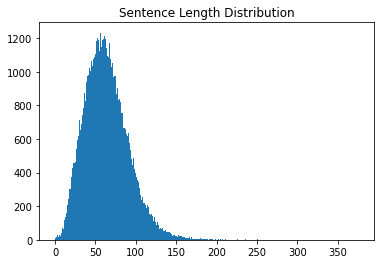

In [9]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

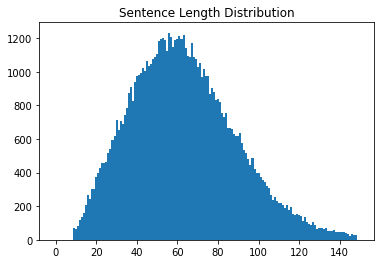

In [10]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [11]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [12]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [13]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [14]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [15]:
mecab = Mecab()

def mecab_split(sentence):
    return mecab.morphs(sentence)
    # 코드를 작성하세요

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [17]:
# Case 1 : tokenizer.sequences_to_texts()

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

초안 보고서 에서 과학자 들 은 인재 로 인한 지구 온난화 가 최근 30 년 물리 적 생물학 적 으로 많 은 영향 을 미쳤 다고 밝혔 다 .


In [18]:
# Case 2 : tokenizer.index_word

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

초안 보고서 에서 과학자 들 은 인재 로 인한 지구 온난화 가 최근 30 년 물리 적 생물학 적 으로 많 은 영향 을 미쳤 다고 밝혔 다 . 


In [19]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [20]:
# Case 1 : tokenizer.sequences_to_texts()

# 여기에 코드를 작성하세요.
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

초안 보고서 에서 과학자 들 은 인재 로 인한 지구 온난화 가 최근 30 년 물리 적 생물학 적 으로 많 은 영향 을 미쳤 다고 밝혔 다 .


In [21]:
# Case 2 : tokenizer.index_word

# 여기에 코드를 작성하세요.

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

초안 보고서 에서 과학자 들 은 인재 로 인한 지구 온난화 가 최근 30 년 물리 적 생물학 적 으로 많 은 영향 을 미쳤 다고 밝혔 다 . 


In [22]:
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 aiffel0042 aiffel0042 376901 10월 13 15:42 korean_spm.model
-rw-r--r-- 1 aiffel0042 aiffel0042 146388 10월 13 15:42 korean_spm.vocab


In [23]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [24]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [25]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


# 네이버 데이터 불러오기

In [26]:
#sentencepiece에 적용을 위해 env -> pandas 형식으로 읽어온다.

train = os.getenv("HOME") + '/aiffel/sentiment_classification/ratings_train.txt'
train_pd = pd.read_csv(train, sep = '\t', quoting = 3)
test = os.getenv("HOME") + '/aiffel/sentiment_classification/ratings_test.txt'
test_pd = pd.read_csv(test, sep = '\t', quoting = 3)

In [27]:
train_pd = train_pd.dropna()
test_pd = test_pd.dropna()

In [28]:
print(train_pd.shape)
print(test_pd.shape)

(149995, 3)
(49997, 3)


In [29]:
# X_train = train_pd['document']
# X_test = test_pd['document']

In [30]:
y_train = train_pd['label']
y_test = test_pd['label']

In [31]:
with open(train, 'w', encoding='utf8') as f:
    f.write('\n'.join(train_pd['document']))


with open(train, 'r', encoding = 'utf-8') as f:
    X_train = f.read().split('\n')

In [32]:
with open(test, 'w', encoding = 'utf-8') as f2:
    f2.write('\n'.join(test_pd['document']))

with open(test, 'r', encoding = 'utf-8') as f:
    X_test = f.read().split('\n')

In [33]:
print(len(X_train))
print(len(X_test))

149995
49997


In [34]:
vocab_size = 8000
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(train, vocab_size)    
)
!ls -l korean_spm*

-rw-r--r-- 1 aiffel0042 aiffel0042 374681 10월 13 15:42 korean_spm.model
-rw-r--r-- 1 aiffel0042 aiffel0042 144164 10월 13 15:42 korean_spm.vocab


In [35]:
sp = spm.SentencePieceProcessor()
sp.load('korean_spm.model')

True

In [36]:
def sp_tokenize(sp, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(sp.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [37]:
train_tensor, train_word_index, train_index_word = sp_tokenize(sp, X_train)
test_tensor, test_word_index, test_index_word = sp_tokenize(sp, X_test)

In [38]:
# X_train = keras.preprocessing.sequence.pad_sequences(X_train,
#                                                         value=word_index["<PAD>"],
#                                                         padding='pre',
#                                                         maxlen=maxlen)

# X_test = keras.preprocessing.sequence.pad_sequences(X_test,
#                                                        value=word_index["<PAD>"],
#                                                        padding='pre',
#                                                        maxlen=maxlen)

# print(X_train.shape)

In [39]:
#모델구성
word_vector_dim = 16  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# model = keras.Sequential()
# model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
# model.add(keras.layers.LSTM(32))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
# model.add(keras.layers.Dense(8, activation='relu'))
# model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.


# model.summary()

종전 모델의 학습이 진행되지 않는 문제 발생. 원인을 알 수 없다.

In [40]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(32, return_sequences = True))
model.add(keras.layers.SpatialDropout1D(0.4))
model.add(keras.layers.Dense(1, activation='sigmoid'))



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          128000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          6272      
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 32)          0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           33        
Total params: 134,305
Trainable params: 134,305
Non-trainable params: 0
_________________________________________________________________


In [41]:
#validation set 구성

# validation set 2만건 분리
X_val = train_tensor[:20000]   
y_val = y_train[:20000]

# validation set을 제외한 나머지 13만건
partial_X_train = train_tensor[20000:]  
partial_y_train = y_train[20000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(129995, 134)
(129995,)


In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
254/254 [==============================] - 3s 11ms/step - loss: 0.5574 - accuracy: 0.6946 - val_loss: 0.4265 - val_accuracy: 0.8080
Epoch 2/10
254/254 [==============================] - 3s 10ms/step - loss: 0.3777 - accuracy: 0.8435 - val_loss: 0.3675 - val_accuracy: 0.8421
Epoch 3/10
254/254 [==============================] - 3s 10ms/step - loss: 0.3516 - accuracy: 0.8536 - val_loss: 0.3668 - val_accuracy: 0.8419
Epoch 4/10
254/254 [==============================] - 2s 10ms/step - loss: 0.3404 - accuracy: 0.8575 - val_loss: 0.3657 - val_accuracy: 0.8349
Epoch 5/10
254/254 [==============================] - 2s 10ms/step - loss: 0.3368 - accuracy: 0.8578 - val_loss: 0.3549 - val_accuracy: 0.8437
Epoch 6/10
254/254 [==============================] - 2s 10ms/step - loss: 0.3314 - accuracy: 0.8601 - val_loss: 0.3663 - val_accuracy: 0.8432
Epoch 7/10
254/254 [==============================] - 3s 10ms/step - loss: 0.3271 - accuracy: 0.8617 - val_loss: 0.3630 - val_accuracy: 0.8428

In [43]:
#Loss, Accuracy 그래프 시각화
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


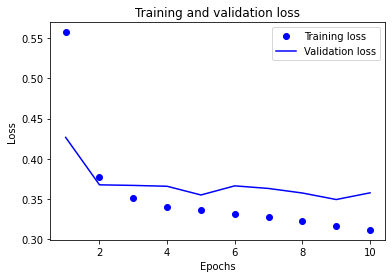

In [44]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

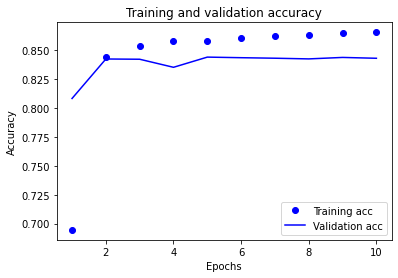

In [45]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
#test 결과
results = model.evaluate(test_tensor,  y_test, verbose=2)

print(results)

1563/1563 - 3s - loss: 0.3728 - accuracy: 0.8371
[0.37276017665863037, 0.8370506763458252]


종전모델의 accuracy는 학습이 진행되지 않으며 0.5 부근에서 수렴했다.이영빈 씨가 만든 모델은 0.83에서 수렴하는 모습을 보인다.